In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats, scipy.special
import pandas as pd

## Load the data

In [3]:
ptable = pd.read_csv('files/raw_data.csv')

In [4]:
ptable

,FWHM,Distance,Cloud
0,0.388140,780.012397,7.0
1,0.200988,931.492337,7.0
2,0.182084,867.304451,7.0
3,0.251579,902.208742,7.0
4,0.429090,792.179073,7.0
...,...,...,...
594,0.105609,152.089741,2.0
595,0.108683,140.935991,2.0
596,0.056719,150.894734,2.0
597,0.077666,148.130308,2.0


#### We're using the pandas package to handle our data. This is a very powerful data structure, great for when you have to handle lots of data with multiple features. Read more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

# Make a histogram of the radii

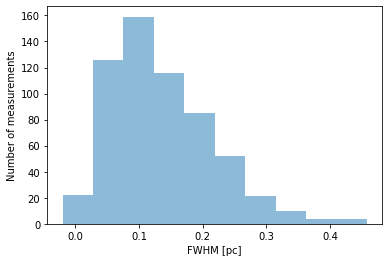

In [5]:
plt.hist(ptable['FWHM'], alpha = 0.5)
plt.xlabel('FWHM [pc]')
plt.ylabel('Number of measurements')
plt.show()

## The data are measurements of filament widths for different clouds. Let's see what the distribution of each cloud looks like separately.

#### How to index pandas dataframes: https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#indexing-selection



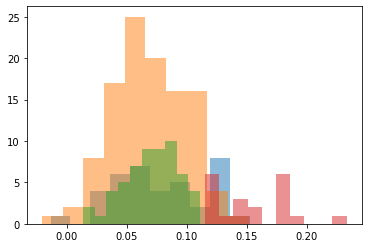

In [7]:
# Create a histogram for each cloud.

# Example: select only rows where 'Region' column has a value equal to 2
# ptable['Distance'][ptable['Region'] == 2]

# Your code here

for i in range(4):
    plt.hist(ptable['FWHM'][ptable['Cloud'] == i], alpha = 0.5)

### What do you notice about the data? 

## The data are measurements of radii for different clouds, located at different distances from the Sun. Select the data from the two clouds that have the most measurements

# Test 1: Are the data consistent with the same parent distribution?

<div class="alert alert-block alert-success">
    
### But first: A primer on probabilities & distributions. 

##### Probability density functions and cumulative distribution functions

For a continuous random variable x, the corresponding probability density function (PDF) is defined as an integrable function f(x) that is non-negative, and with an area under the curve (integral) equal to 1, such that the probability of observing x in the interval (a,b) is given as:

$ P (\alpha < x < \beta) = \int_\alpha^\beta f(x) dx$

and recall the probability of x being *somewhere* is 1:

$ P(-\infty < x < \infty) = \int_{-\infty}^{+\infty} f(x) dx = 1 $

</div>

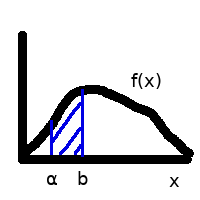

<div class="alert alert-block alert-success"> 
A cumulative distribution function (CDF) $F(x)$ is a monotonic, non-decreasing function in the support of $f(x)$, and evaluated as x, defines the probability that continuous random variable x will take a value less than or equal to b:

$P( x < b) = F(x) =  \int_{-\infty}^b f(x) dx$
</div>

### Examples of PDFs and their corresponding CDFs:

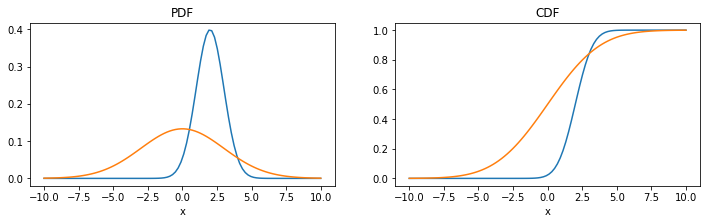

In [32]:
# define our random variable values
x = np.linspace(-10,10,100)
# Define two functions as PDF examples
sigma1 = 1.
mu1 = 2.
f1 = 1/sigma1/np.sqrt(2*np.pi) * np.exp(-(x - mu1)**2 / (2*sigma1**2))

sigma2 = 3
mu2 = 0.
f2 = 1/sigma2/np.sqrt(2*np.pi) * np.exp(-(x - mu2)**2 / (2*sigma2**2))

# and the corresponding CDF:
F1 = 1/2. * (1 + scipy.special.erf(((x - mu1)/ (sigma1 * np.sqrt(2.)) )) )
F2 = 1/2. * (1 + scipy.special.erf(((x - mu2)/ (sigma2 * np.sqrt(2.)) )) )

f, ax = plt.subplots(figsize = (12,3), nrows = 1, ncols = 2)
ax[0].plot(x,f1)
ax[1].plot(x,F1)

ax[0].plot(x,f2)
ax[1].plot(x,F2)
ax[0].set_title('PDF')
ax[1].set_title('CDF')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

plt.show()

## How can we tell if the data from these two clouds have the same statistical properties? 


## The tools of statistics can't immediately tell us 'yes' or 'no', instead they can answer questions of the type: 'how likely is it that A is happening, as opposed to B?'

### These types of questions are tackled by *Hypothesis testing*.

<div class="alert alert-block alert-success">
    
## A primer on Hypotheses, testing them and p-values

#### Say we think our data is determined by a process which has a PDF f(x). We want to figure out whether f(x) may indeed be happening. So we make a *hypothesis*, let's say that f(x) were true. Are the data compatible with this hypothesis? 
#### To check this, we make a measurement $x_{obs}$:
</div>

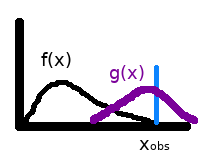

<div class="alert alert-block alert-success">
    
### Now we can ask: How likely is it that we would observe $x_{obs}$ if our expected process were operating?
#### The answer is given by the p-value:

$p = P(x \geq x_{obs} | H) $ *

- how likely it is that your data could have occurred if the null hypothesis, H , were true?
- the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct. 

For example: If your p value is 0.05, that means that 5% of the time you would see a result at least as extreme as the one you found if the null hypothesis was true.

<b>Basic idea: if there is only a very small probability to find data with even worse (or equal) compatibility, then H is “disfavoured by the data”.</b>  If the p-value is below a user-defined threshold α (e.g. 0.01) then H is rejected.
  
  
#### A general note on Philosophy of Science: 
 
The only way to gain new information is to reject a hypothesis. In Physics we can never be sure that a model/theory (hypothesis) is true. We can only test whether it is incompatible with the data. So our experiments are made to try and disprove models. 

If we can't disprove a theory, we are stuck with it. Progress comes from trying to prove yourself wrong! Not very intuitive is it?

</div>

* footnote: This definition refers to a one-sided p-value. Depending on the hypothesis, the f(x) and the data, you can also formulate a 2-sided p-value. E.g. if f(x) is a Gaussian centered on 0, a 2-sided p-value would check whether the data are more extreme than expected by f(x) on both sides (negative and positive values).

## Let's formulate our question again: are the data from these two clouds just random draws from the same parent distribution?

In [33]:
# Step 1: Plot a histogram of radii in each cloud. 
# This can be loosely interpreted as a PDF (without the normalization)

In [46]:
# Step 2: Construct and plot CDF for each cloud on the same graph

In [47]:
# Step 3: Compute max distance between the two CDFs

## If difference is big, the distributions are likely not the same. But how big is too big?

## Let's quantify this with a Monte Carlo sampling test.

In [48]:
# Draw random samples from each distribution.

In [50]:
# Calculation of the distance between these new CDFs

In [ ]:
# Repeat 1000 times

In [51]:
# Count how often the measured distance appears in this experiment.

## Congratulations! You've estimated your first p-value!

### Scipy allows you to compute the p-value quickly with scipy.stats.ks_2samp. 

In [ ]:
### Use the ks_2samp function to compare to your result above.

## What's so special about some clouds? Why are they different?

### Make a scatter plot to visualize the data (width vs distance) and highlight cloud 6

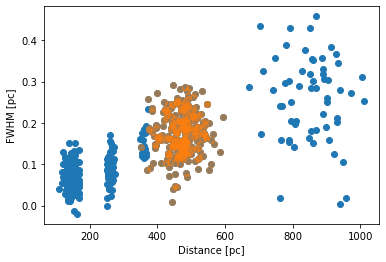

In [8]:
plt.scatter(ptable['Distance'],ptable['FWHM'])
plt.scatter(ptable['Distance'][ptable['Cloud'] ==6], ptable['FWHM'][ptable['Cloud'] ==6], alpha = 0.5)
plt.xlabel('Distance [pc]')
plt.ylabel('FWHM [pc]')
plt.show()

### Why are filaments in far away clouds 'fatter'? Telescope resolution!

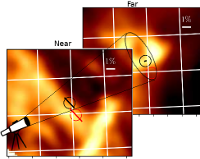

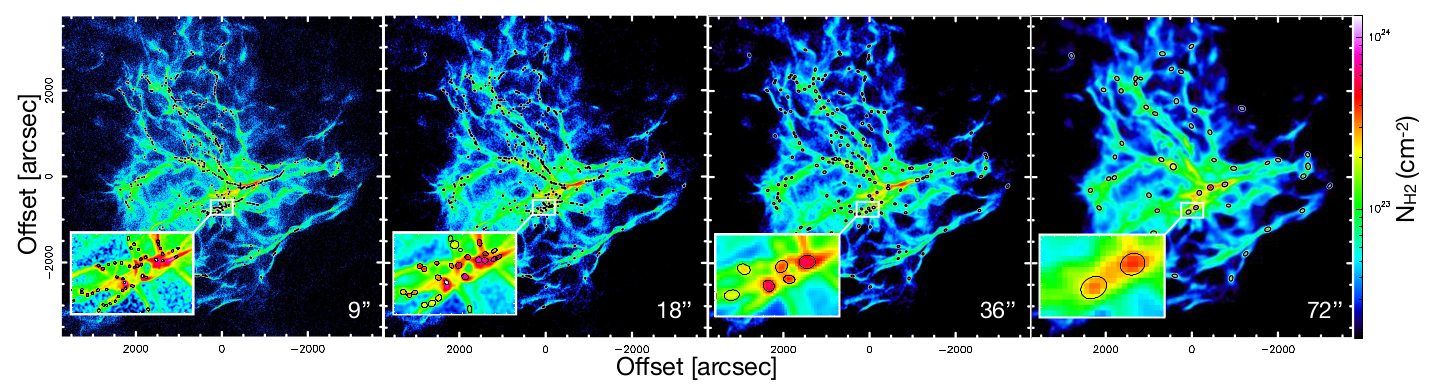